In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

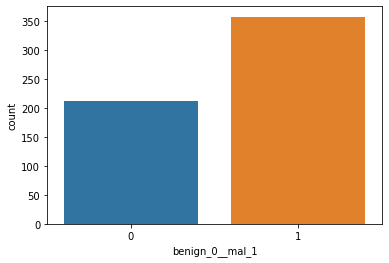

In [4]:
sns.countplot(x = 'benign_0__mal_1', data=df)

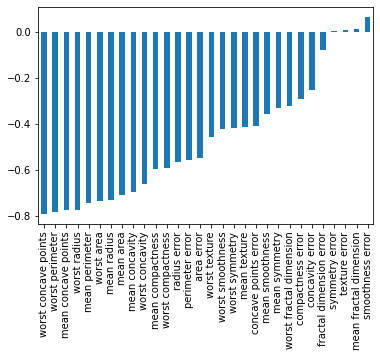

In [8]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [11]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 24)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**OVERFITTING EXAMPLE**

In [27]:
model = Sequential()

In [19]:
X.shape

(569, 30)

In [28]:
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=500)

In [30]:
loss_df = pd.DataFrame(model.history.history)

In [31]:
loss_df

,loss,val_loss
0,0.497702,0.409249
1,0.368228,0.313725
2,0.291781,0.256723
3,0.241677,0.219524
4,0.208145,0.193153
...,...,...
495,0.000055,0.268054
496,0.000054,0.268118
497,0.000054,0.268433
498,0.000054,0.268681


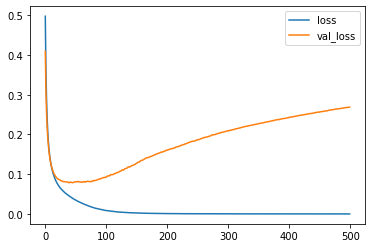

In [32]:
loss_df.plot()

**CALLBACKS EXAMPLE**

In [33]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=15)

In [36]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=500, callbacks=[early_stop])

Epoch 1/500
7/7 [==============================] - 0s 17ms/step - loss: 0.5722 - val_loss: 0.5082
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.4745 - val_loss: 0.4286
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 0.3976 - val_loss: 0.3655
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.3380 - val_loss: 0.3131
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.2874 - val_loss: 0.2694
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.2448 - val_loss: 0.2337
Epoch 7/500
7/7 [==============================] - 0s 4ms/step - loss: 0.2107 - val_loss: 0.2048
Epoch 8/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1840 - val_loss: 0.1820
Epoch 9/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1627 - val_loss: 0.1637
Epoch 10/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1454 - val_loss: 0.1500
Epoch 11/500
7/7 [==========

In [37]:
loss_df = pd.DataFrame(model.history.history)

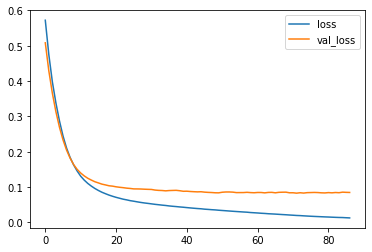

In [38]:
loss_df.plot()

**DROPOUT LAYER**

In [39]:
from tensorflow.keras.layers import Dropout

In [40]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [41]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=500, callbacks=[early_stop])

Epoch 1/500
7/7 [==============================] - 0s 25ms/step - loss: 0.8540 - val_loss: 0.7060
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 0.7659 - val_loss: 0.6033
Epoch 3/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6374 - val_loss: 0.5255
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 0.5752 - val_loss: 0.4628
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 0.5066 - val_loss: 0.4116
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 0.4948 - val_loss: 0.3664
Epoch 7/500
7/7 [==============================] - 0s 5ms/step - loss: 0.4343 - val_loss: 0.3262
Epoch 8/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3744 - val_loss: 0.2912
Epoch 9/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3819 - val_loss: 0.2607
Epoch 10/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3397 - val_loss: 0.2343
Epoch 11/500
7/7 [==========

In [42]:
loss_df = pd.DataFrame(model.history.history)

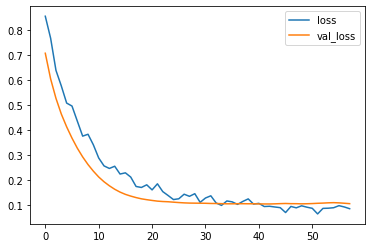

In [43]:
loss_df.plot()

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [47]:
confusion_matrix(y_true=y_test,y_pred = predictions)

array([[51,  2],
       [ 5, 85]])